# SIMILARITY BASED CROPPING

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2

#imageA = cv2.imread('1_1_bin.jpg')
#imageB = cv2.imread('33_1_bin.jpg')
#grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
#grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

imageA = cv2.imread('5_1_bin.jpg')
imageB = cv2.imread('107_1_bin.jpg')
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


error: ignored

In [ ]:
# Structural Similarity Index (SSIM) between the two images,the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

In [ ]:
# threshold the difference image, finding contours to obtain the regions that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# loop over the contours
import numpy as np
import matplotlib.pyplot as plt
width=[]
diag=[]
for c in cnts:
	# compute the bounding box of the contour and then draw it
  (x, y, w, h) = cv2.boundingRect(c)
  dia = np.sqrt(w**2 +h**2)
  diag.append(w)
  width.append([x, y, w, h])
#np.shape(width)
a =np.argmax(diag)
(x1, y1, w1, h1) = width[a]
imA = 255*np.ones([160,124,3])
# Restricting box inside the FP image. box dimensions =[124,160]. Pad the box if dimensions are less.
cv2.rectangle(imageA, (x1, y1-40), (x1 + 124, y1 + 120), (0, 0, 255), 2)
if (y1+120 > np.shape(imageA)[0]) and (x1+124 > np.shape(imageA)[1]) :
  imA[0:np.shape(imageA)[0]-y1+40, 0:np.shape(imageA)[1] -x1] = imageA[y1-40:np.shape(imageA)[0], x1:np.shape(imageA)[1]]
elif (y1+120 > np.shape(imageA)[0]) and (x1+124 <= np.shape(imageA)[1]):
  imA[0:np.shape(imageA)[0]-y1+40,:] = imageA[y1-40:np.shape(imageA)[0], x1:x1+124]
elif (y1+120 <= np.shape(imageA)[0]) and (x1+124 > np.shape(imageA)[1]):
  imA[:, 0:np.shape(imageA)[1] -x1] = imageA[y1-40:y1+120, x1:np.shape(imageA)[1]]
else:
  imA = imageA[y1-40:y1+120, x1:x1+124]
imB = 255*np.ones([160,124,3])
cv2.rectangle(imageB, (x1, y1-40), (x1 + 124, y1 + 120), (0, 0, 255), 2)
if (y1+120 > np.shape(imageB)[0]) and (x1+124 > np.shape(imageB)[1]) :
  imB[0:np.shape(imageB)[0]-y1+40, 0:np.shape(imageB)[1] -x1] = imageB[y1-40:np.shape(imageB)[0], x1:np.shape(imageB)[1]]
elif (y1+120 > np.shape(imageB)[0]) and (x1+124 <= np.shape(imageB)[1]):
  imB[0:np.shape(imageB)[0]-y1+40,:] = imageB[y1-40:np.shape(imageB)[0], x1:x1+124]
elif (y1+120 <= np.shape(imageB)[0]) and (x1+124 > np.shape(imageB)[1]):
  imB[:, 0:np.shape(imageB)[1] -x1] = imageB[y1-40:y1+120, x1:np.shape(imageB)[1]]
else:
  imB = imageB[y1-40:y1+120, x1:x1+124]
plot, fig = plt.subplots(2,2)
fig[0][0].imshow(imageA)
fig[0][1].imshow(imA)
fig[1][0].imshow(imageB)
fig[1][1].imshow(imB)
#plt.imshow(diff)
#plt.imshow(thresh)

In [ ]:
#%% [code]
# loop over the contours
import numpy as np
import matplotlib.pyplot as plt
width=[]
diag=[]
for c in cnts:
	# compute the bounding box of the contour and then draw it
  (x, y, w, h) = cv2.boundingRect(c)
  dia = np.sqrt(w**2 +h**2)
  diag.append(dia)
  width.append([x, y, w, h])
#np.shape(width)
a =np.argmax(diag)
(x1, y1, w1, h1) = width[a]
cv2.rectangle(imageA, (x1, y1-40), (x1 + 124, y1 + 120), (0, 0, 255), 2)
imA = imageA[y1-40:y1+120, x1:x1+124]
cv2.rectangle(imageB, (x1, y1-40), (x1 + 124, y1 + 120), (0, 0, 255), 2)
imB = imageB[y1-40:y1+120, x1:x1+124]
plot, fig = plt.subplots(2,2)
fig[0][0].imshow(imageA)
fig[0][1].imshow(imA)
fig[1][0].imshow(imageB)
fig[1][1].imshow(imB)
#plt.imshow(diff)
#plt.imshow(thresh)

In [ ]:
im1 = imageA[y1-40:y1+120, x1:x1+124]
plt.imshow(im1)
#x1

In [ ]:
import torchvision.transforms

imA = np.zeros(np.shape(imA)) - imA
imA = torchvision.transforms.ToPILImage()(np.uint8(255*imA))
imA.save(f"14_1_r.jpg", dpi=(500,500)) 

imB = np.zeros(np.shape(imB)) - imB
imB = torchvision.transforms.ToPILImage()(np.uint8(255*imB))
imB.save(f"14_1_f.jpg", dpi=(500,500)) 

In [ ]:
img = cv2.imread('/content/imA_crop.jpg')
plt.imshow(img)

#FREQUENCY SPECTRUMS

In [ ]:
def preprocess_img(img):
  for ii in range(1,50):
    if min(img[:,img.shape[1]-1,0]) > 200:
      img = img[0:img.shape[0],0:img.shape[1]-1]
    if min(img[:,1,0]) >200:
      img = img[0:img.shape[0],1:img.shape[1]]
    if min(img[img.shape[0]-1,:,0]) > 200:
      img = img[0:img.shape[0]-1,0:img.shape[1]]
    if min(img[1,:,0]) >200:
      img = img[1:img.shape[0],0:img.shape[1]]
  return img
def plot_freqspec(grayA,grayB):
  f = np.fft.fft2(grayA)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))
  f1 = np.fft.fft2(grayB)
  fshift1 = np.fft.fftshift(f1)
  magnitude_spectrum1 = 20*np.log(np.abs(fshift1))

  cv2_subt = cv2.subtract(magnitude_spectrum, magnitude_spectrum1)
  r2, cv2_thresh= cv2.threshold(cv2_subt,1, 255, cv2.THRESH_BINARY_INV)
  kernel = 3*np.ones((3,3))
  kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
  opening = cv2.morphologyEx(cv2_thresh, cv2.MORPH_OPEN, kernel1)

  fig, axs = plt.subplots(7, 1,figsize=(15,28))
  axs[0].imshow(grayA,cmap='gray')
  axs[1].imshow(magnitude_spectrum,cmap='gray')
  axs[2].imshow(grayB, cmap = 'gray')
  axs[3].imshow(magnitude_spectrum1, cmap = 'gray')
  axs[4].imshow(cv2_subt,cmap='gray')
  axs[5].imshow(cv2_thresh, cmap='gray')
  axs[6].imshow(opening,cmap='gray')
  plt.show()
  (score, diff) = compare_ssim(magnitude_spectrum, magnitude_spectrum1, full=True)
  diff = (diff * 255).astype("uint8")
  print("SSIM: {}".format(score))
  return

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

imageA = cv2.imread('7.jpg')
imageB = cv2.imread('18_3_bin.jpg')

imageA=preprocess_img(imageA)
imageB=preprocess_img(imageB) 

grayA = cv2.resize(cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY),(200,300))
grayB = cv2.resize(cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY),(200,300))

# WHORL(R) - T ARCH(F)

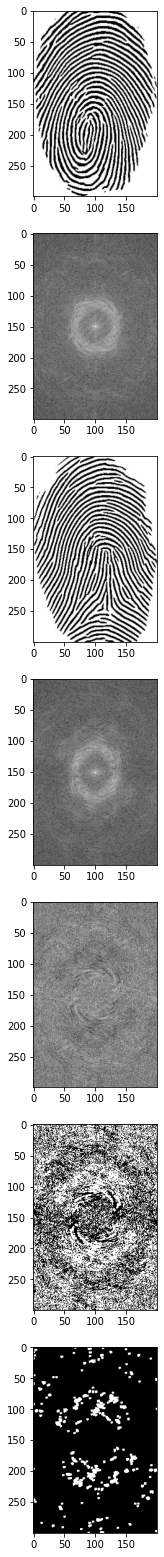

SSIM: 0.023451629300858028


In [ ]:
plot_freqspec(grayA,grayB)

# WHORL (R) - RIGHT (F)

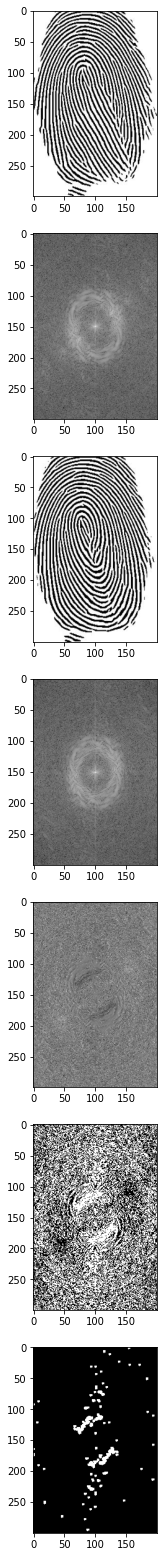

SSIM: 0.05196849170547878


In [ ]:
plot_freqspec(grayA,grayB)

# WHORL (R) - T ARCH (R)

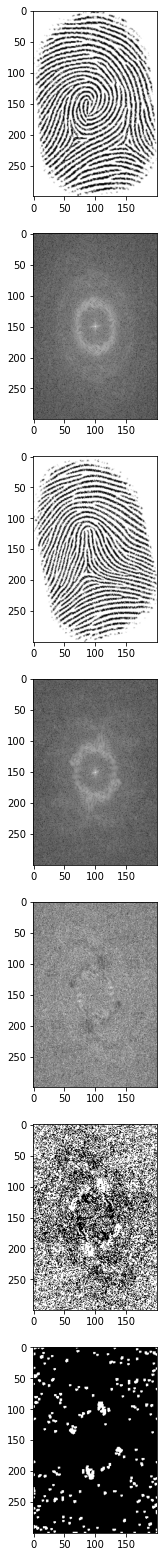

SSIM: 0.021107386928487605


In [ ]:
plot_freqspec(grayB,grayA)

# T ARCH (R VS F)

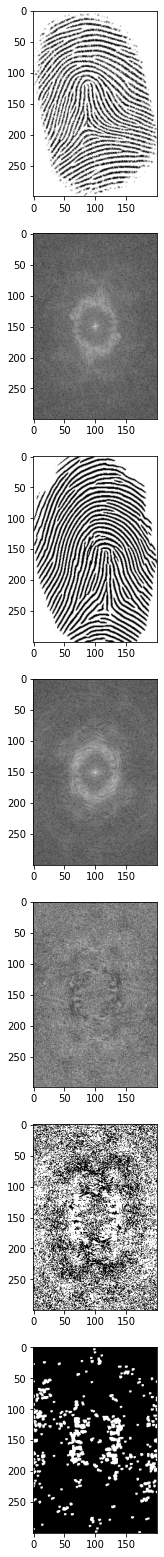

SSIM: 0.016063978873377665


In [ ]:
plot_freqspec(grayA,grayB)

#OTHER

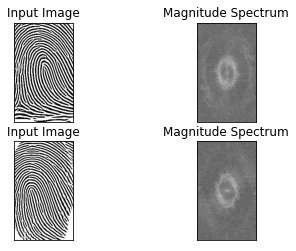

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

imageA = cv2.imread('118_3_r.jpg')
imageB = cv2.imread('88_2_r.jpg')
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY) # ,(200,300))
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY) # ,(200,300))

import numpy as np

f = np.fft.fft2(grayA)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
f1 = np.fft.fft2(grayB)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(fshift1))
plt.subplot(221),plt.imshow(grayA, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(grayB, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
(score, diff) = compare_ssim(magnitude_spectrum, magnitude_spectrum1, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.025534573544661095


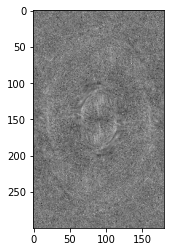

In [ ]:
cv2_subt = cv2.subtract(magnitude_spectrum, magnitude_spectrum1)
cv2_mean = cv2.mean(cv2_subt)
plt.imshow(cv2_subt,cmap='gray')

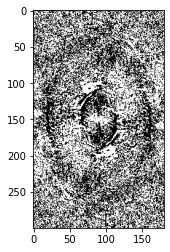

In [ ]:
r2, cv2_thresh= cv2.threshold(cv2_subt,1, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2_thresh, cmap='gray')

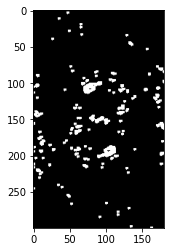

In [ ]:
kernel = 3*np.ones((3,3))
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
opening = cv2.morphologyEx(cv2_thresh, cv2.MORPH_OPEN, kernel1)
plt.imshow(opening,cmap='gray')

# AVG FP  FREQ SPEC COMPARISION

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
from google.colab import drive
import matplotlib.pyplot as plt
import glob
import cv2
from PIL import Image
import numpy as np
import sys
import cv2
import torchvision.transforms
import numpy as np
import cv2
from scipy import signal
from scipy import ndimage
import math
import scipy

mount_point = '/content/drive'
drive.mount(mountpoint=mount_point)

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/Data_Clean.zip

In [ ]:
filename

'/content/Data_Clean/A/277.jpg'

In [ ]:
image_enhancer = FingerprintImageEnhancer() 

A1= []
i=0
for filename in glob.glob('/content/Data_Clean/A/*.jpg'):
    #im=Image.open(filename)
    img = cv2.imread(filename,0)
    out = np.ones((350,240)) - image_enhancer.enhance(img)
    im1 = torchvision.transforms.ToPILImage()(np.uint8(255*out))
    name = '/content/ThA/'+str(i)+ 'bin.jpg'
    im1.save(name, dpi=(500,500)) 
    f = np.fft.fft2(im1)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    A1.append(np.array(magnitude_spectrum,dtype=np.uint8))
    i=i+1
A1=np.array(A1)

In [ ]:
LL1= []
i=0
for filename in glob.glob('/content/Data_Clean/LL/*.jpg'):
    #im=Image.open(filename)
    img = cv2.imread(filename,0)
    out = np.ones((350,240)) - image_enhancer.enhance(img)
    im1 = torchvision.transforms.ToPILImage()(np.uint8(255*out))
    name = '/content/ThLL/'+str(i)+ 'bin.jpg'
    im1.save(name, dpi=(500,500))      
    f = np.fft.fft2(im1)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    LL1.append(np.array(magnitude_spectrum,dtype=np.uint8))
    i=i+1
LL1=np.array(LL1)

RL1= []
i=0
for filename in glob.glob('/content/Data_Clean/RL/*.jpg'):
    #im=Image.open(filename)
    img = cv2.imread(filename,0)
    out = np.ones((350,240)) - image_enhancer.enhance(img)
    im1 = torchvision.transforms.ToPILImage()(np.uint8(255*out)) 
    name = '/content/ThRL/'+str(i)+ 'bin.jpg'
    im1.save(name, dpi=(500,500))
    f = np.fft.fft2(im1)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    RL1.append(np.array(magnitude_spectrum,dtype=np.uint8))
    i=i+1
RL1=np.array(RL1)

TA1= []
i=0
for filename in glob.glob('/content/Data_Clean/TA/*.jpg'):
    #im=Image.open(filename)
    img = cv2.imread(filename,0)
    out = np.ones((350,240)) - image_enhancer.enhance(img)
    im1 = torchvision.transforms.ToPILImage()(np.uint8(255*out))
    name = '/content/ThTA/'+str(i)+ 'bin.jpg'
    im1.save(name, dpi=(500,500)) 
    f = np.fft.fft2(im1)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    TA1.append(np.array(magnitude_spectrum,dtype=np.uint8))
    i=i+1
TA1=np.array(TA1)

i=0
W1= []
for filename in glob.glob('/content/Data_Clean/W/*.jpg'):
    #im=Image.open(filename)
    img = cv2.imread(filename,0)
    out = np.ones((350,240)) - image_enhancer.enhance(img)
    im1 = torchvision.transforms.ToPILImage()(np.uint8(255*out)) 
    name = '/content/ThW/'+str(i)+ 'bin.jpg'
    im1.save(name, dpi=(500,500))
    f = np.fft.fft2(im1)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    W1.append(np.array(magnitude_spectrum,dtype=np.uint8))
    i=i+1
W1=np.array(W1)

In [ ]:
import shutil
shutil.move("/content/A_MagSpec_Avg.jpg", "/content/drive/MyDrive/Enhanced_Images/")
shutil.move("/content/LL_MagSpec_Avg.jpg", "/content/drive/MyDrive/Enhanced_Images/")
shutil.move("/content/RL_MagSpec_Avg.jpg", "/content/drive/MyDrive/Enhanced_Images/")
shutil.move("/content/TA_MagSpec_Avg.jpg", "/content/drive/MyDrive/Enhanced_Images/")
shutil.move("/content/W_MagSpec_Avg.jpg", "/content/drive/MyDrive/Enhanced_Images/")

'/content/drive/MyDrive/Enhanced_Images/W_MagSpec_Avg.jpg'

'/content/drive/MyDrive/ThW'

 (500, 350, 240)
 (350, 240)


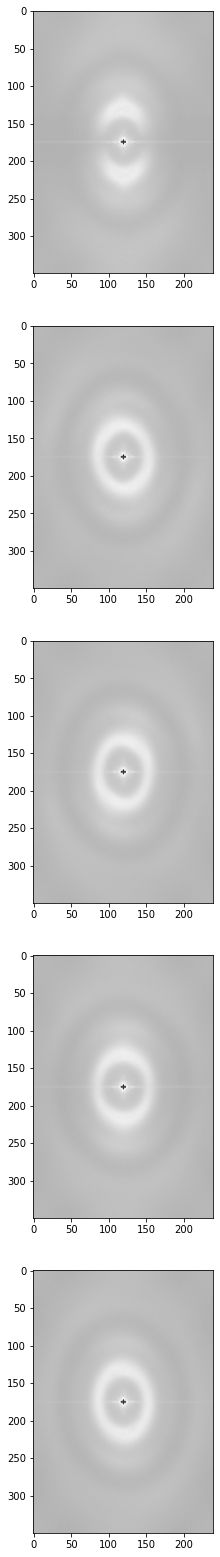

In [ ]:
from PIL import Image
A1Ave = np.average(A1,axis=0)
A1Ave = np.array(A1Ave,dtype=np.uint8)
im1 = Image.fromarray(A1Ave) 
im1.save("A_MagSpec_Avg.jpg")
LL1Ave = np.average(LL1,axis=0)
LL1Ave = np.array(LL1Ave,dtype=np.uint8)
im1 = Image.fromarray(LL1Ave) 
im1 = im1.save("LL_MagSpec_Avg.jpg")
RL1Ave = np.average(RL1,axis=0)
RL1Ave = np.array(RL1Ave,dtype=np.uint8)
im1 = Image.fromarray(RL1Ave) 
im1 = im1.save("RL_MagSpec_Avg.jpg")
TA1Ave = np.average(TA1,axis=0)
TA1Ave = np.array(TA1Ave,dtype=np.uint8)
im1 = Image.fromarray(TA1Ave) 
im1 = im1.save("TA_MagSpec_Avg.jpg")
W1Ave = np.average(W1,axis=0)
W1Ave = np.array(W1Ave,dtype=np.uint8)
im1 = Image.fromarray(W1Ave) 
im1 = im1.save("W_MagSpec_Avg.jpg")
print('',np.shape(A1))
print('',np.shape(A1Ave))
fig, axs = plt.subplots(5, 1,figsize=(15,28))
axs[0].imshow(A1Ave,cmap='gray')
axs[1].imshow(LL1Ave,cmap='gray')
axs[2].imshow(RL1Ave, cmap = 'gray')
axs[3].imshow(TA1Ave, cmap = 'gray')
axs[4].imshow(W1Ave,cmap='gray')
plt.show()

SSIM: 0.33736008794344374


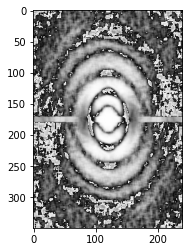

In [ ]:
(score, diff) = compare_ssim(A1Ave, W1Ave, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
plt.imshow(diff,cmap='gray')

SSIM: 0.39703788872131157


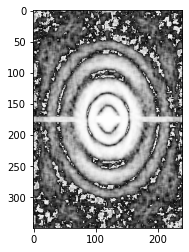

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
(score, diff) = compare_ssim(RL1Ave, LL1Ave, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
plt.imshow(diff,cmap='gray')

SSIM: 0.2893477973835302


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  # Remove the CWD from sys.path while we load stuff.


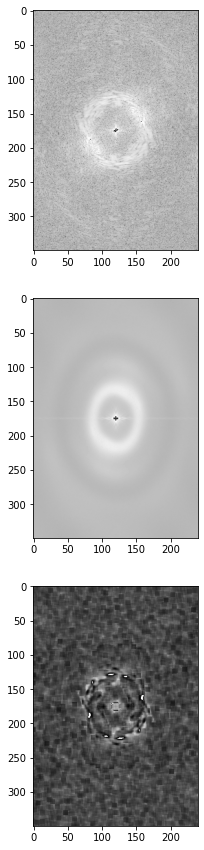

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
RLFake = cv2.imread('7_0_f_bin.jpg',0)
RLFake = cv2.resize(RLFake,(240,350))

f = np.fft.fft2(RLFake)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
mgspec = np.array(magnitude_spectrum,dtype=np.uint8)

(score, diff) = compare_ssim(mgspec, RL1Ave, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

fig, axs = plt.subplots(3, 1,figsize=(11,15))
axs[0].imshow(mgspec,cmap='gray')
axs[1].imshow(RL1Ave,cmap='gray')
axs[2].imshow(diff, cmap = 'gray')

# CLASS- THINNING

In [ ]:
class FingerprintImageEnhancer(object):
    def __init__(self):
        self.ridge_segment_blksze = 16
        self.ridge_segment_thresh = 0.1
        self.gradient_sigma = 1
        self.block_sigma = 7
        self.orient_smooth_sigma = 7
        self.ridge_freq_blksze = 38
        self.ridge_freq_windsze = 5
        self.min_wave_length = 5
        self.max_wave_length = 15
        self.kx = 0.65
        self.ky = 0.65
        self.angleInc = 3
        self.ridge_filter_thresh = -3


        self._mask = []
        self._normim = []
        self._orientim = []
        self._mean_freq = []
        self._median_freq = []
        self._freq = []
        self._freqim = []
        self._binim = []

    def __normalise(self, img, mean, std):
        normed = (img - np.mean(img)) / (np.std(img))
        return (normed)

    def __ridge_segment(self, img):
       
        rows, cols = img.shape
        im = self.__normalise(img, 0, 1)  # normalise to get zero mean and unit standard deviation

        new_rows = np.int(self.ridge_segment_blksze * np.ceil((np.float(rows)) / (np.float(self.ridge_segment_blksze))))
        new_cols = np.int(self.ridge_segment_blksze * np.ceil((np.float(cols)) / (np.float(self.ridge_segment_blksze))))

        padded_img = np.zeros((new_rows, new_cols))
        stddevim = np.zeros((new_rows, new_cols))
        padded_img[0:rows][:, 0:cols] = im
        for i in range(0, new_rows, self.ridge_segment_blksze):
            for j in range(0, new_cols, self.ridge_segment_blksze):
                block = padded_img[i:i + self.ridge_segment_blksze][:, j:j + self.ridge_segment_blksze]

                stddevim[i:i + self.ridge_segment_blksze][:, j:j + self.ridge_segment_blksze] = np.std(block) * np.ones(block.shape)

        stddevim = stddevim[0:rows][:, 0:cols]
        self._mask = stddevim > self.ridge_segment_thresh
        mean_val = np.mean(im[self._mask])
        std_val = np.std(im[self._mask])
        self._normim = (im - mean_val) / (std_val)

    def __ridge_orient(self):

        rows,cols = self._normim.shape
        #Calculate image gradients.
        sze = np.fix(6*self.gradient_sigma)
        if np.remainder(sze,2) == 0:
            sze = sze+1

        gauss = cv2.getGaussianKernel(np.int(sze),self.gradient_sigma)
        f = gauss * gauss.T

        fy,fx = np.gradient(f)                               #Gradient of Gaussian

        Gx = signal.convolve2d(self._normim, fx, mode='same')
        Gy = signal.convolve2d(self._normim, fy, mode='same')

        Gxx = np.power(Gx,2)
        Gyy = np.power(Gy,2)
        Gxy = Gx*Gy

        #Now smooth the covariance data to perform a weighted summation of the data.
        sze = np.fix(6*self.block_sigma)

        gauss = cv2.getGaussianKernel(np.int(sze), self.block_sigma)
        f = gauss * gauss.T

        Gxx = ndimage.convolve(Gxx,f)
        Gyy = ndimage.convolve(Gyy,f)
        Gxy = 2*ndimage.convolve(Gxy,f)

        # Analytic solution of principal direction
        denom = np.sqrt(np.power(Gxy,2) + np.power((Gxx - Gyy),2)) + np.finfo(float).eps

        sin2theta = Gxy/denom                   # Sine and cosine of doubled angles
        cos2theta = (Gxx-Gyy)/denom


        if self.orient_smooth_sigma:
            sze = np.fix(6*self.orient_smooth_sigma)
            if np.remainder(sze,2) == 0:
                sze = sze+1
            gauss = cv2.getGaussianKernel(np.int(sze), self.orient_smooth_sigma)
            f = gauss * gauss.T
            cos2theta = ndimage.convolve(cos2theta,f)                   # Smoothed sine and cosine of
            sin2theta = ndimage.convolve(sin2theta,f)                   # doubled angles

        self._orientim = np.pi/2 + np.arctan2(sin2theta,cos2theta)/2

    def __ridge_freq(self):
  
        rows, cols = self._normim.shape
        freq = np.zeros((rows, cols))

        for r in range(0, rows - self.ridge_freq_blksze, self.ridge_freq_blksze):
            for c in range(0, cols - self.ridge_freq_blksze, self.ridge_freq_blksze):
                blkim = self._normim[r:r + self.ridge_freq_blksze][:, c:c + self.ridge_freq_blksze]
                blkor = self._orientim[r:r + self.ridge_freq_blksze][:, c:c + self.ridge_freq_blksze]

                freq[r:r + self.ridge_freq_blksze][:, c:c + self.ridge_freq_blksze] = self.__frequest(blkim, blkor)

        self._freq = freq * self._mask
        freq_1d = np.reshape(self._freq, (1, rows * cols))
        ind = np.where(freq_1d > 0)

        ind = np.array(ind)
        ind = ind[1, :]

        non_zero_elems_in_freq = freq_1d[0][ind]

        self._mean_freq = np.mean(non_zero_elems_in_freq)
        self._median_freq = np.median(non_zero_elems_in_freq)  # does not work properly

        self._freq = self._mean_freq * self._mask

    def __frequest(self, blkim, blkor):
       
        rows, cols = np.shape(blkim)

        cosorient = np.mean(np.cos(2 * blkor))
        sinorient = np.mean(np.sin(2 * blkor))
        orient = math.atan2(sinorient, cosorient) / 2

        rotim = scipy.ndimage.rotate(blkim, orient / np.pi * 180 + 90, axes=(1, 0), reshape=False, order=3,
                                     mode='nearest')

        cropsze = int(np.fix(rows / np.sqrt(2)))
        offset = int(np.fix((rows - cropsze) / 2))
        rotim = rotim[offset:offset + cropsze][:, offset:offset + cropsze]

        proj = np.sum(rotim, axis=0)
        dilation = scipy.ndimage.grey_dilation(proj, self.ridge_freq_windsze, structure=np.ones(self.ridge_freq_windsze))

        temp = np.abs(dilation - proj)

        peak_thresh = 2

        maxpts = (temp < peak_thresh) & (proj > np.mean(proj))
        maxind = np.where(maxpts)

        rows_maxind, cols_maxind = np.shape(maxind)

        if (cols_maxind < 2):
            return(np.zeros(blkim.shape))
        else:
            NoOfPeaks = cols_maxind
            waveLength = (maxind[0][cols_maxind - 1] - maxind[0][0]) / (NoOfPeaks - 1)
            if waveLength >= self.min_wave_length and waveLength <= self.max_wave_length:
                return(1 / np.double(waveLength) * np.ones(blkim.shape))
            else:
                return(np.zeros(blkim.shape))

    def __ridge_filter(self):

        im = np.double(self._normim)
        rows, cols = im.shape
        newim = np.zeros((rows, cols))

        freq_1d = np.reshape(self._freq, (1, rows * cols))
        ind = np.where(freq_1d > 0)

        ind = np.array(ind)
        ind = ind[1, :]

        non_zero_elems_in_freq = freq_1d[0][ind]
        non_zero_elems_in_freq = np.double(np.round((non_zero_elems_in_freq * 100))) / 100

        unfreq = np.unique(non_zero_elems_in_freq)

        sigmax = 1 / unfreq[0] * self.kx
        sigmay = 1 / unfreq[0] * self.ky

        sze = np.int(np.round(3 * np.max([sigmax, sigmay])))

        x, y = np.meshgrid(np.linspace(-sze, sze, (2 * sze + 1)), np.linspace(-sze, sze, (2 * sze + 1)))

        reffilter = np.exp(-(((np.power(x, 2)) / (sigmax * sigmax) + (np.power(y, 2)) / (sigmay * sigmay)))) * np.cos(
            2 * np.pi * unfreq[0] * x)        # this is the original gabor filter

        filt_rows, filt_cols = reffilter.shape

        angleRange = np.int(180 / self.angleInc)

        gabor_filter = np.array(np.zeros((angleRange, filt_rows, filt_cols)))

        for o in range(0, angleRange):

            rot_filt = scipy.ndimage.rotate(reffilter, -(o * self.angleInc + 90), reshape=False)
            gabor_filter[o] = rot_filt

        # Find indices of matrix points greater than maxsze from the image
        # boundary

        maxsze = int(sze)

        temp = self._freq > 0
        validr, validc = np.where(temp)

        temp1 = validr > maxsze
        temp2 = validr < rows - maxsze
        temp3 = validc > maxsze
        temp4 = validc < cols - maxsze

        final_temp = temp1 & temp2 & temp3 & temp4

        finalind = np.where(final_temp)

        # Convert orientation matrix values from radians to an index value
        # that corresponds to round(degrees/angleInc)

        maxorientindex = np.round(180 / self.angleInc)
        orientindex = np.round(self._orientim / np.pi * 180 / self.angleInc)

        # do the filtering
        for i in range(0, rows):
            for j in range(0, cols):
                if (orientindex[i][j] < 1):
                    orientindex[i][j] = orientindex[i][j] + maxorientindex
                if (orientindex[i][j] > maxorientindex):
                    orientindex[i][j] = orientindex[i][j] - maxorientindex
        finalind_rows, finalind_cols = np.shape(finalind)
        sze = int(sze)
        for k in range(0, finalind_cols):
            r = validr[finalind[0][k]]
            c = validc[finalind[0][k]]

            img_block = im[r - sze:r + sze + 1][:, c - sze:c + sze + 1]

            newim[r][c] = np.sum(img_block * gabor_filter[int(orientindex[r][c]) - 1])

        self._binim = newim < self.ridge_filter_thresh

    def save_enhanced_image(self, path):

        cv2.imwrite(path, (255 * self._binim))

    def enhance(self, img, resize=True):
        # main function to enhance the image.
        # calls all other subroutines

        if(resize):
            rows, cols = np.shape(img)
            aspect_ratio = np.double(rows) / np.double(cols)

            new_rows = 350                      # randomly selected number
            new_cols = new_rows / aspect_ratio

            img = cv2.resize(img, (np.int(new_cols), np.int(new_rows)))

        self.__ridge_segment(img)   # normalise the image and find a ROI
        self.__ridge_orient()       # compute orientation image
        self.__ridge_freq()         # compute major frequency of ridges
        self.__ridge_filter()       # filter the image using oriented gabor filter
        return(self._binim)

In [ ]:
image_enhancer = FingerprintImageEnhancer()         # Create object called image_enhancer
img = cv2.imread('Data_Clean/A/7.jpg',0)
out = np.ones((350,240)) - image_enhancer.enhance(img)
out = torchvision.transforms.ToPILImage()(np.uint8(255*out)) 

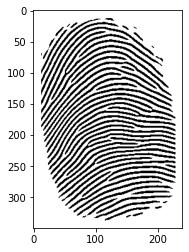

In [ ]:
plt.imshow(out,cmap='gray')